# Linear Discriminant Analysis (LDA)
Técnica de extracción de características que puede usarse para incrementar la efifiencia computacional y reducir los sobreajustes. Se busca un subespacio de las características que nos sirva mejor para garantizar la separabilidad de clases. 

1. Estandarizar el conjunto
2. Para cada clase obtener el vector de medias
3. Obtener la matriz de dispersión entre las clases $S_b$ y la matriz de la propia clase $S_W$
4. Determinar los eigenvalores y eigenvectores a la matriz $S_W^{-1}S_B$
5. Ordenar los eigenvalores decrecientemente
6. Seleccionar los k eigenvectores
7. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
, header=None)

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X.shape

(178, 13)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [6]:
lda = LDA(n_components=2)
lr = LogisticRegression()

In [7]:
x_train_lda = lda.fit_transform(X_train_std, y_train[:, 0])
lr.fit(x_train_lda, y_train[:, 0])

LogisticRegression()

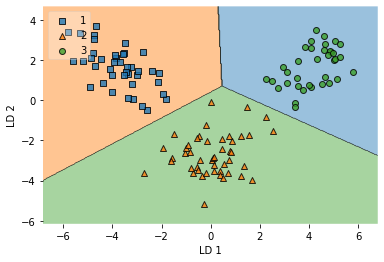

In [8]:
plot_decision_regions(x_train_lda, y_train[:, 0].astype(np.integer), clf=lr, legend=2)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

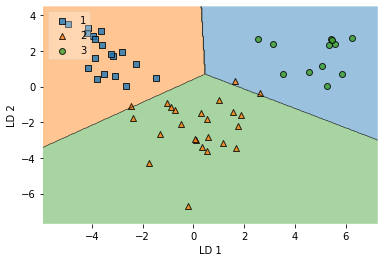

In [14]:
x_test_lda = lda.transform(X_test_std)
plot_decision_regions(x_test_lda, y_test[:, 0].astype(np.integer), clf=lr, legend=2)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

### Tarea: obtener la matriz de dispersión

$S = \sum_{j=1}^{n} (x_j-\bar{x})(x_j-\bar{x})^T$

In [15]:
#Muestras: 
[
    [1,2,3,2,3],
    [2,2,1,3,2]
]
#Medias:
[
    [2.2, 2]
]
#Diferencias
[
    [1-2.2, 2-2.2, 3-2.2, 2-2.2, 3-2.2],
    [2-2, 2-2, 1-2, 3-2, 2-2],
]
# = 
[
    [-1.2, -0.2, 0.8, -0.2, 0.8], 
    [0, 0, -1, 1, 0]
]
#T
[
    [-1.2, 0],
    [-0.2, 0],
    [0.8, -1], 
    [-0.2, 1], 
    [0.8,  0]
]
#-----matriz de dispersión
[
    [2.8, -1],
    [-1, 2]
]

[[2.8, -1], [-1, 2]]